#Problem 1

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

#1.1) Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.

##Importing Libraries

In [355]:
import numpy as np
import pandas as pd

In [356]:
from google.colab import drive
drive.mount ("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [357]:
df = pd.read_excel("/content/drive/My Drive/GreatLearning/Machine Learning/Project/Election_Data.xlsx")

In [358]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [359]:
df.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [361]:
df.describe()

,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,763.000000,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,440.373894,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,382.000000,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,763.000000,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,1144.000000,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,1525.000000,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [362]:
df.rename(columns={'Unnamed: 0' : 'Serial No.'}, inplace=True)

In [363]:
df.head()

,Serial No.,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [364]:
df.rename(columns={'vote' : 'Vote'}, inplace=True)
df.rename(columns={'age' : 'Age'}, inplace=True)
df.rename(columns={'economic.cond.national' : 'National Economic Condition'}, inplace=True)
df.rename(columns={'economic.cond.household' : 'National Household Condition'}, inplace=True)
df.rename(columns={'political.knowledge' : 'Political Knowledge'}, inplace=True)
df.rename(columns={'gender' : 'Gender'}, inplace=True)

In [365]:
df.head()

,Serial No.,Vote,Age,National Economic Condition,National Household Condition,Blair,Hague,Europe,Political Knowledge,Gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [366]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,1525.0,763.000000,440.373894,1.0,382.0,763.0,1144.0,1525.0
Age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
National Economic Condition,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
National Household Condition,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
Political Knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


#1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

###Univariate Analysis

In [367]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Count')

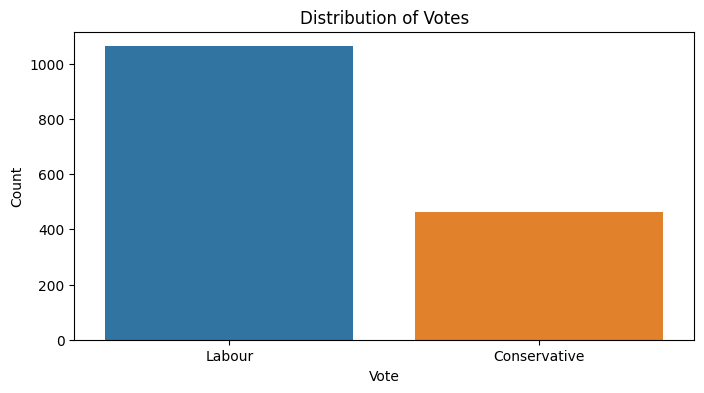

In [368]:
plt.figure(figsize=(8,4))
sns.countplot(x='Vote', data=df)
plt.title('Distribution of Votes')
plt.xlabel('Vote')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

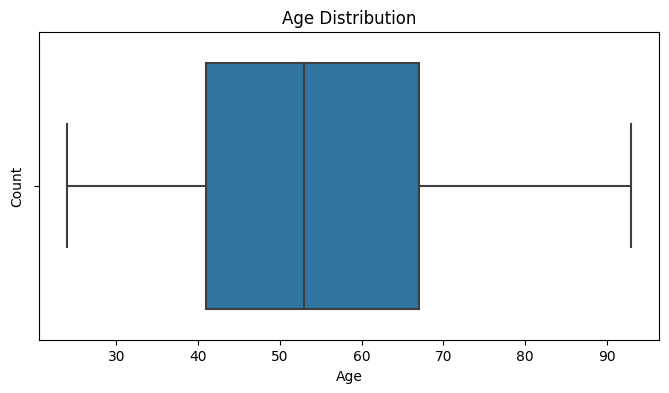

In [369]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Age', data=df)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

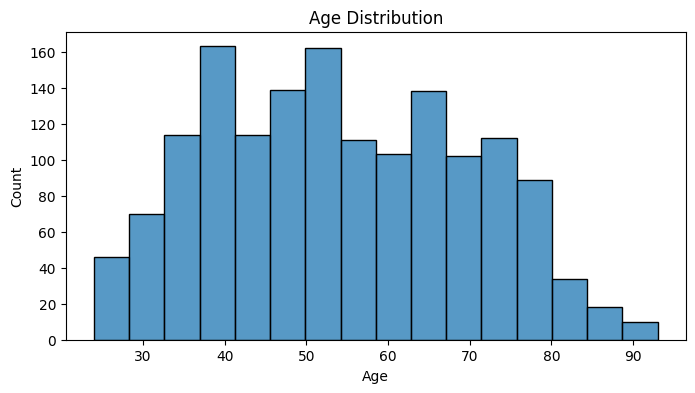

In [370]:
plt.figure(figsize=(8,4))
sns.histplot(x='Age', data=df)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

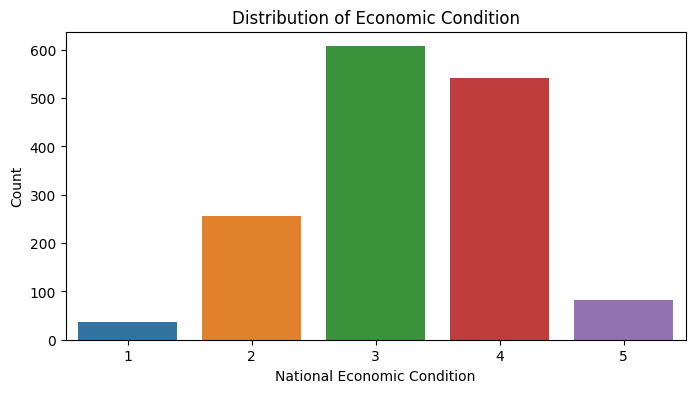

In [371]:
plt.figure(figsize=(8,4))
sns.countplot(x='National Economic Condition', data=df);
plt.xlabel('National Economic Condition')
plt.title('Distribution of Economic Condition')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

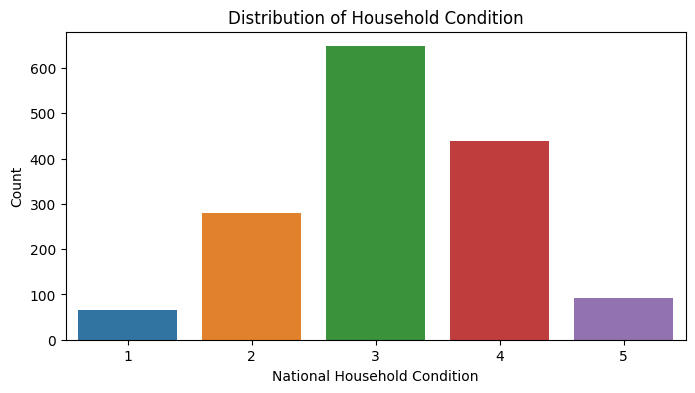

In [372]:
plt.figure(figsize=(8,4))
sns.countplot(x='National Household Condition', data=df)
plt.title('Distribution of Household Condition')
plt.xlabel('National Household Condition')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

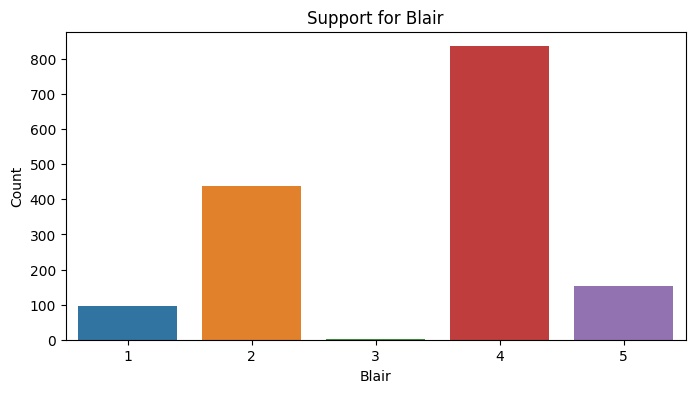

In [373]:
plt.figure(figsize=(8,4))
sns.countplot(x='Blair', data=df)
plt.title('Support for Blair')
plt.xlabel('Blair')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

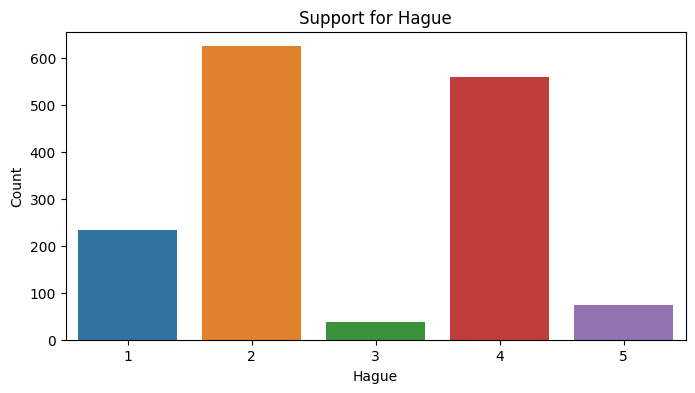

In [374]:
plt.figure(figsize=(8,4))
sns.countplot(x='Hague', data=df)
plt.title('Support for Hague')
plt.xlabel('Hague')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

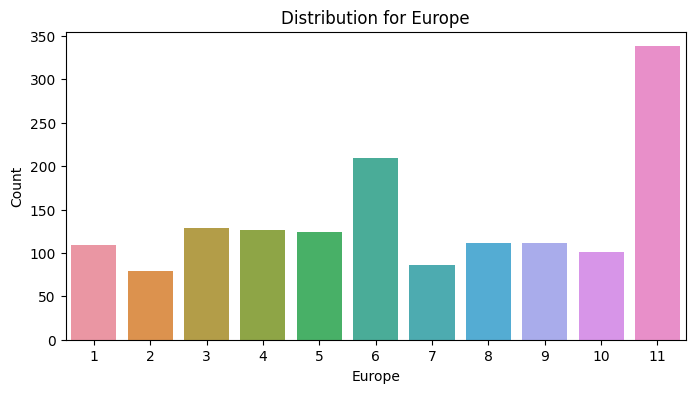

In [375]:
plt.figure(figsize=(8,4))
sns.countplot(x='Europe', data=df)
plt.title('Distribution for Europe')
plt.xlabel('Europe')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

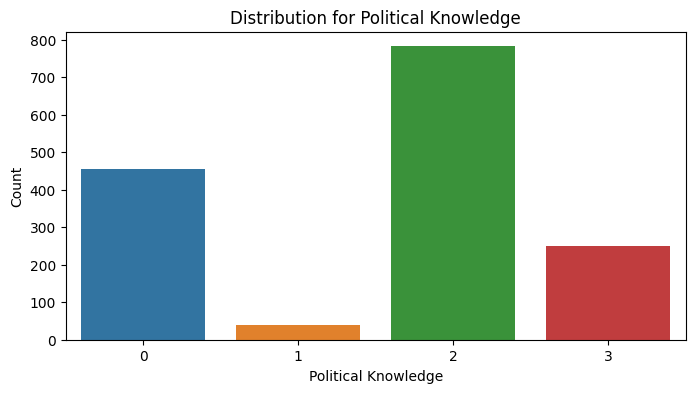

In [376]:
plt.figure(figsize=(8,4))
sns.countplot(x='Political Knowledge', data=df)
plt.title('Distribution for Political Knowledge')
plt.xlabel('Political Knowledge')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

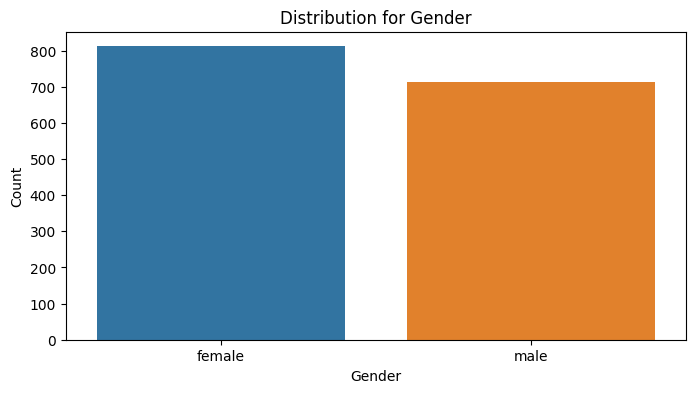

In [377]:
plt.figure(figsize=(8,4))
sns.countplot(x='Gender', data=df)
plt.title('Distribution for Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

###Bivariate Analysis

<Axes: xlabel='Vote', ylabel='Age'>

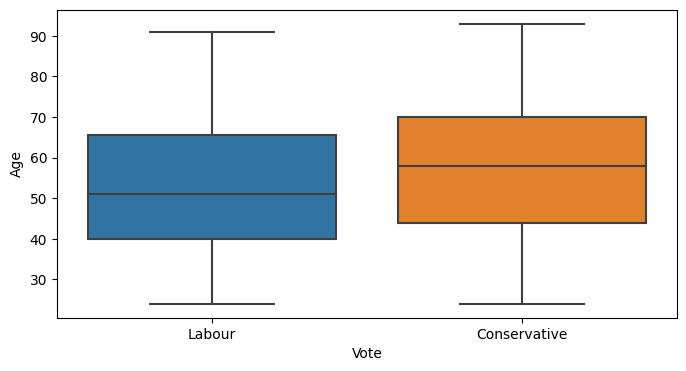

In [378]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Vote', y='Age', data = df)

<Axes: xlabel='National Economic Condition', ylabel='count'>

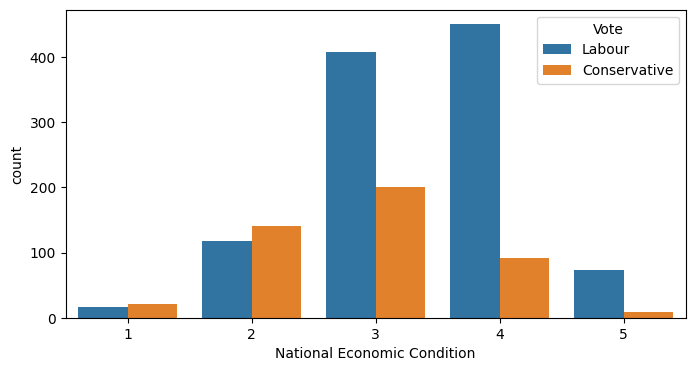

In [379]:
plt.figure(figsize=(8,4))
sns.countplot(x='National Economic Condition', hue='Vote', data = df)

<Axes: xlabel='National Household Condition', ylabel='count'>

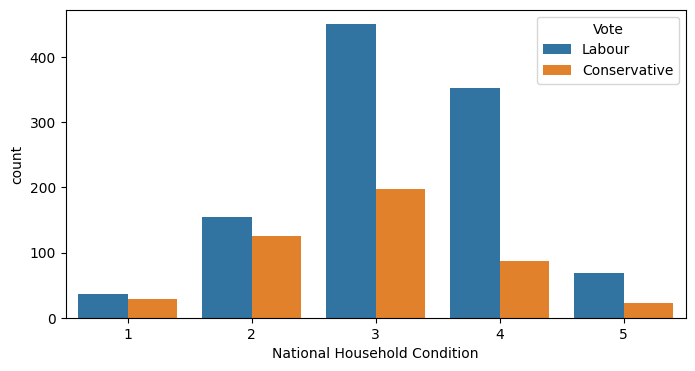

In [380]:
plt.figure(figsize=(8,4))
sns.countplot(x='National Household Condition', hue='Vote', data = df)

<Axes: xlabel='Blair', ylabel='count'>

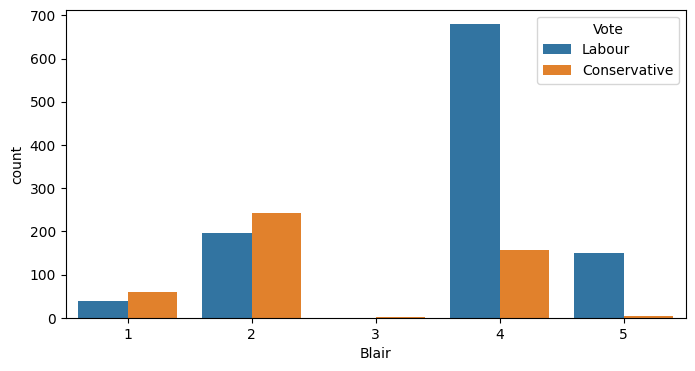

In [381]:
plt.figure(figsize=(8,4))
sns.countplot(x='Blair', hue='Vote', data = df)

<Axes: xlabel='Hague', ylabel='count'>

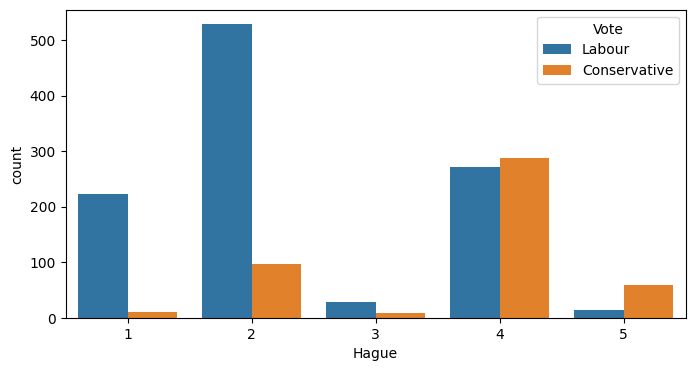

In [382]:
plt.figure(figsize=(8,4))
sns.countplot(x='Hague', hue='Vote', data = df)

<Axes: xlabel='Europe', ylabel='count'>

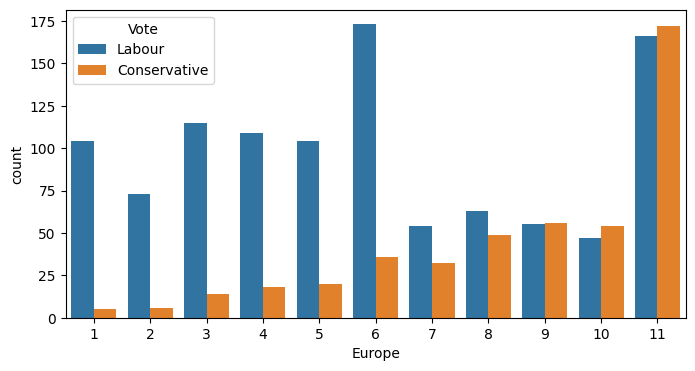

In [383]:
plt.figure(figsize=(8,4))
sns.countplot(x='Europe', hue='Vote', data = df)

<Axes: xlabel='Political Knowledge', ylabel='count'>

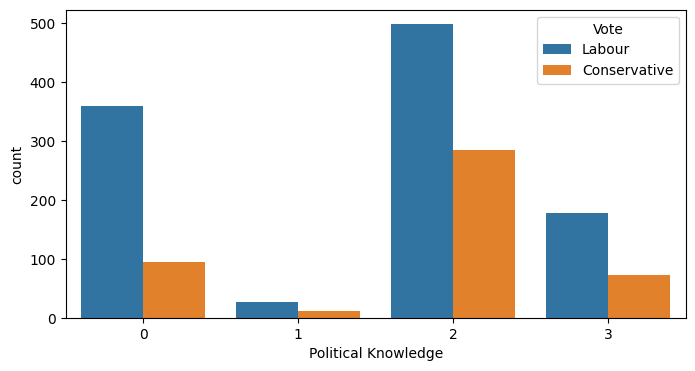

In [384]:
plt.figure(figsize=(8,4))
sns.countplot(x='Political Knowledge', hue='Vote', data = df)

<Axes: xlabel='Gender', ylabel='count'>

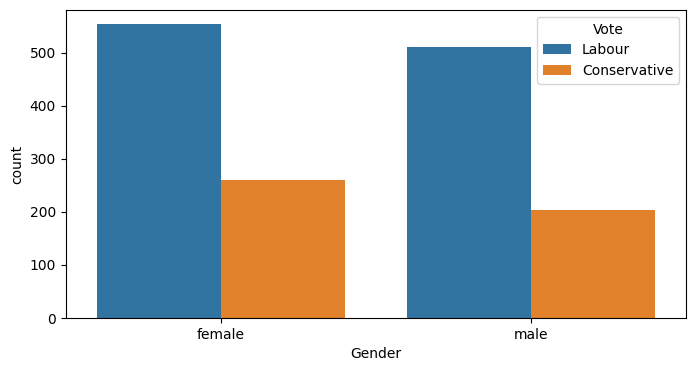

In [385]:
plt.figure(figsize=(8,4))
sns.countplot(x='Gender', hue='Vote', data = df)

#1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.

In [386]:
df.head()

,Serial No.,Vote,Age,National Economic Condition,National Household Condition,Blair,Hague,Europe,Political Knowledge,Gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Serial No.                    1525 non-null   int64 
 1   Vote                          1525 non-null   object
 2   Age                           1525 non-null   int64 
 3   National Economic Condition   1525 non-null   int64 
 4   National Household Condition  1525 non-null   int64 
 5   Blair                         1525 non-null   int64 
 6   Hague                         1525 non-null   int64 
 7   Europe                        1525 non-null   int64 
 8   Political Knowledge           1525 non-null   int64 
 9   Gender                        1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [388]:
df.drop('Serial No.', axis=1, inplace=True)

In [389]:
df = pd.get_dummies (df, columns=['Vote', 'Gender'], drop_first =True)

In [390]:
df.head()

,Age,National Economic Condition,National Household Condition,Blair,Hague,Europe,Political Knowledge,Vote_Labour,Gender_male
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1


In [391]:
X = df.drop('Vote_Labour', axis=1)
Y = df['Vote_Labour']

In [392]:
X.head()

,Age,National Economic Condition,National Household Condition,Blair,Hague,Europe,Political Knowledge,Gender_male
0,43,3,3,4,1,2,2,0
1,36,4,4,4,4,5,2,1
2,35,4,4,5,2,3,2,1
3,24,4,2,2,1,4,0,0
4,41,2,2,1,1,6,2,1


In [393]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Vote_Labour, dtype: uint8

In [394]:
from sklearn.model_selection import train_test_split

#Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)

In [395]:
X_train.head()

,Age,National Economic Condition,National Household Condition,Blair,Hague,Europe,Political Knowledge,Gender_male
1372,74,4,4,4,2,2,2,1
126,46,4,3,4,4,2,2,1
327,77,3,3,2,4,9,2,1
292,51,3,3,4,2,6,1,0
1058,37,3,4,4,2,8,0,0


In [396]:
X_test.head()

,Age,National Economic Condition,National Household Condition,Blair,Hague,Europe,Political Knowledge,Gender_male
782,35,4,4,5,2,6,2,1
76,42,4,3,4,2,4,2,0
1009,32,4,3,4,2,4,1,0
1403,48,3,3,2,4,2,2,0
846,35,3,4,2,1,11,2,0


In [397]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067 entries, 1372 to 1126
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Age                           1067 non-null   int64
 1   National Economic Condition   1067 non-null   int64
 2   National Household Condition  1067 non-null   int64
 3   Blair                         1067 non-null   int64
 4   Hague                         1067 non-null   int64
 5   Europe                        1067 non-null   int64
 6   Political Knowledge           1067 non-null   int64
 7   Gender_male                   1067 non-null   uint8
dtypes: int64(7), uint8(1)
memory usage: 67.7 KB


In [398]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 782 to 1463
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Age                           458 non-null    int64
 1   National Economic Condition   458 non-null    int64
 2   National Household Condition  458 non-null    int64
 3   Blair                         458 non-null    int64
 4   Hague                         458 non-null    int64
 5   Europe                        458 non-null    int64
 6   Political Knowledge           458 non-null    int64
 7   Gender_male                   458 non-null    uint8
dtypes: int64(7), uint8(1)
memory usage: 29.1 KB


#1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both model s (2 pts). Successful implementation of each model. Logical reason should be shared if any custom changes are made to the parameters while building the model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

##Logistic Regression

In [399]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

Accuracy score for logistic regression: 0.8144104803493449
[[230  99]
 [ 69 669]]
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       329
           1       0.87      0.91      0.89       738

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


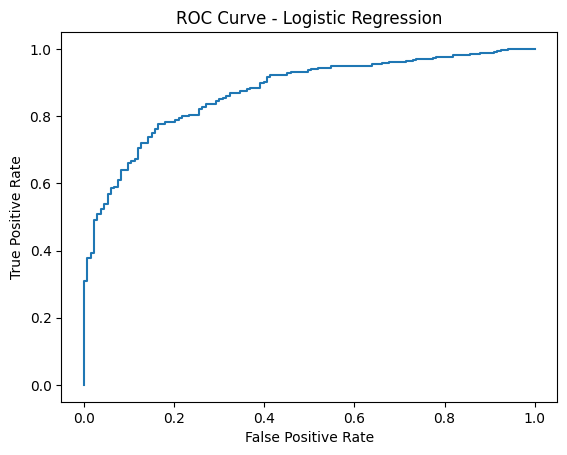

In [400]:
# Fit logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
y_pred_logreg = logreg.predict(X_test)

# Get accuracy score for logistic regression model
accuracy_logreg = accuracy_score(Y_test, y_pred_logreg)
print("Accuracy score for logistic regression:", accuracy_logreg)

Y_predict=logreg.predict(X_train)
print(metrics.confusion_matrix(Y_train, Y_predict))
print(metrics.classification_report(Y_train, Y_predict))

# Get ROC curve for logistic regression model
y_pred_proba_logreg = logreg.predict_proba(X_test)[:,1]
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(Y_test, y_pred_proba_logreg)
plt.plot(fpr_logreg, tpr_logreg)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.show()

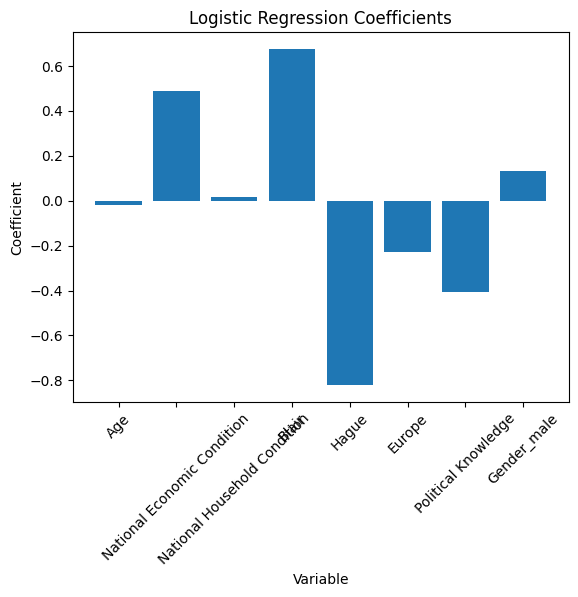

In [401]:
plt.bar(X.columns, logreg.coef_[0,:])
plt.ylabel('Coefficient')
plt.xlabel('Variable')
plt.title('Logistic Regression Coefficients')
plt.xticks(rotation=45)
plt.show()

##LDA

In [402]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Accuracy score for LDA: 0.8122270742358079
[[229 100]
 [ 68 670]]
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       329
           1       0.87      0.91      0.89       738

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



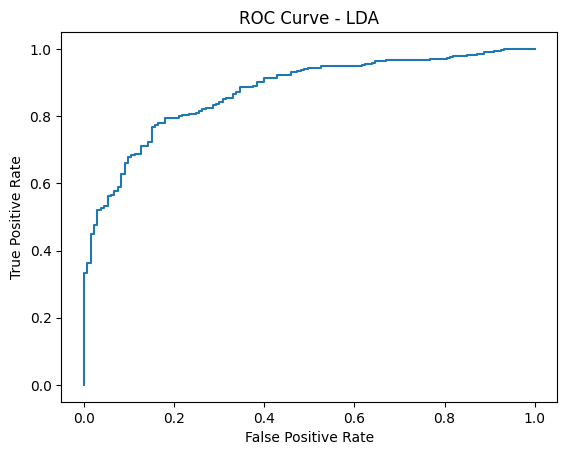

ROC score for LDA: 0.8730595720069404


In [403]:
# Fit LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
y_pred_lda = lda.predict(X_test)

# Get accuracy score for LDA model
accuracy_lda = accuracy_score(Y_test, y_pred_lda)
print("Accuracy score for LDA:", accuracy_lda)


Y_predict=lda.predict(X_train)
print(metrics.confusion_matrix(Y_train, Y_predict))
print(metrics.classification_report(Y_train, Y_predict))

# Get ROC curve for LDA model
y_pred_proba_lda = lda.predict_proba(X_test)[:,1]
fpr_lda, tpr_lda, thresholds_lda = roc_curve(Y_test, y_pred_proba_lda)
plt.plot(fpr_lda, tpr_lda)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - LDA")
plt.show()

# Get ROC score for LDA model
roc_score_lda = roc_auc_score(Y_test, y_pred_proba_lda)
print("ROC score for LDA:", roc_score_lda)


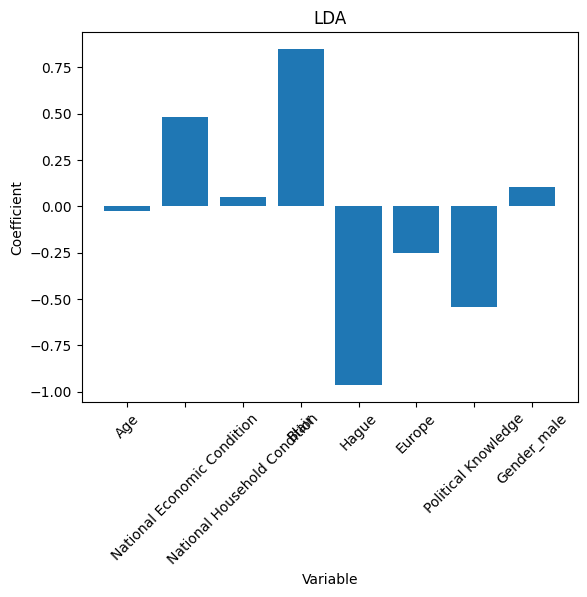

In [404]:
plt.bar(X.columns, lda.coef_[0,:])
plt.ylabel('Coefficient')
plt.xlabel('Variable')
plt.title('LDA')
plt.xticks(rotation=45)
plt.show()

#1.5) Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason should be shared if any custom changes are made to the parameters while building the model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

In [405]:
cat=[ ] #categorical list
num=[ ] #numeric list
for i in X.columns:
  if X[i].dtype=='category':
    cat.append(i)
  else:
    num.append(i)

In [407]:
from sklearn.preprocessing import MinMaxScaler

In [408]:
scaler=MinMaxScaler().fit(X_train[num])
X_train_scale=scaler.transform(X_train[num])
X_test_scale=scaler.transform(X_test[num])

##KNN Model

In [409]:
KNN=KNeighborsClassifier(metric='minkowski' ,n_jobs=-1, n_neighbors=5)

In [410]:
# Call Nearest Neighbour algorithm

KNN.fit(X_train_scale, Y_train)

KNeighborsClassifier(n_jobs=-1)

In [411]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will
# be assigned to the test data point
train_score=KNN.score(X_train_scale, Y_train)
test_score=KNN.score(X_test_scale, Y_test)
print('Accurecy of NNH on','\n','train data-', train_score,'\n','test data-', test_score)

Accurecy of NNH on 
 train data- 0.880037488284911 
 test data- 0.7751091703056768


In [412]:
predicted_labels = KNN.predict(X_train_scale)
print(metrics.confusion_matrix(Y_train, predicted_labels))
print(metrics.classification_report(Y_train, predicted_labels))

[[260  69]
 [ 59 679]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       329
           1       0.91      0.92      0.91       738

    accuracy                           0.88      1067
   macro avg       0.86      0.86      0.86      1067
weighted avg       0.88      0.88      0.88      1067



In [413]:
# calculate accuracy measures and confusion matrix
predicted_labels = KNN.predict(X_test_scale)
print(metrics.confusion_matrix(Y_test, predicted_labels))
print(metrics.classification_report(Y_test, predicted_labels))

[[ 86  47]
 [ 56 269]]
              precision    recall  f1-score   support

           0       0.61      0.65      0.63       133
           1       0.85      0.83      0.84       325

    accuracy                           0.78       458
   macro avg       0.73      0.74      0.73       458
weighted avg       0.78      0.78      0.78       458



In [414]:
# AUC and ROC for the training data
probs = KNN.predict_proba(X_train_scale)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

AUC: 0.944


In [415]:
#AUC and ROC for the test data
probs= KNN.predict_proba(X_test_scale)
probs=probs[:, 1]

auc=roc_auc_score(Y_test, probs)
print(auc)

0.8209485251590516


In [416]:
trn_score=[]
test_score=[]

for k in range(5,30,2):
  KNN=KNeighborsClassifier(metric='cosine', n_jobs=-1, n_neighbors=k, )
  KNN.fit(X_train_scale, Y_train)
  trn_score.append(KNN.score(X_train_scale, Y_train))
  test_score.append(KNN.score(X_test_scale, Y_test))

In [417]:
np.subtract(trn_score,test_score)

array([0.08277503, 0.06654375, 0.06373213, 0.06840793, 0.05311386,
       0.05560626, 0.04811883, 0.04000319, 0.04281481, 0.02845795,
       0.03625436, 0.03125934, 0.04062118])

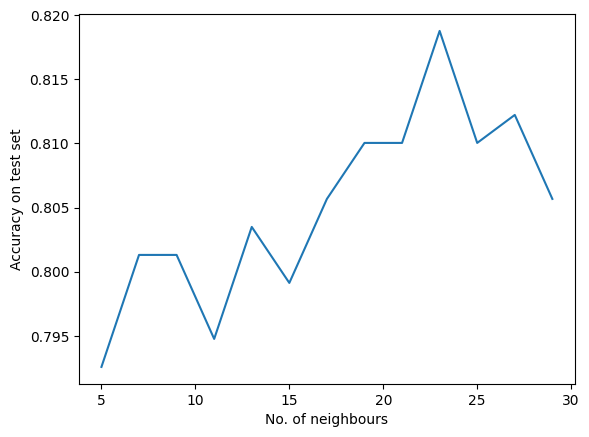

In [418]:
plt.plot(range(5,30,2), test_score)
plt.xlabel('No. of neighbours')
plt.ylabel('Accuracy on test set')
plt.show()

In [ ]:
KNN=KNeighborsClassifier(n_neighbors=7, metric='minkowski' ,n_jobs=-1)
KNN.fit(X_train_scale, Y_train)
train_score=KNN.score(X_train_scale, Y_train)
test_score=KNN.score(X_test_scale, Y_test)
print('Accurecy of NNH on','\n','train data-', train_score,'\n','test data-', test_score)

In [420]:
predicted_labels = KNN.predict(X_train_scale)
print(metrics.confusion_matrix(Y_train, predicted_labels))
print(metrics.classification_report(Y_train, predicted_labels))

[[254  75]
 [ 62 676]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       329
           1       0.90      0.92      0.91       738

    accuracy                           0.87      1067
   macro avg       0.85      0.84      0.85      1067
weighted avg       0.87      0.87      0.87      1067



In [421]:
# calculate accuracy measures and confusion matrix
predicted_labels = KNN.predict(X_test_scale)
print(metrics.confusion_matrix(Y_test, predicted_labels))
print(metrics.classification_report(Y_test, predicted_labels))

[[ 85  48]
 [ 50 275]]
              precision    recall  f1-score   support

           0       0.63      0.64      0.63       133
           1       0.85      0.85      0.85       325

    accuracy                           0.79       458
   macro avg       0.74      0.74      0.74       458
weighted avg       0.79      0.79      0.79       458



In [422]:
# AUC and ROC for the training data
probs = KNN.predict_proba(X_train_scale)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

AUC: 0.938


0.8309196067090804


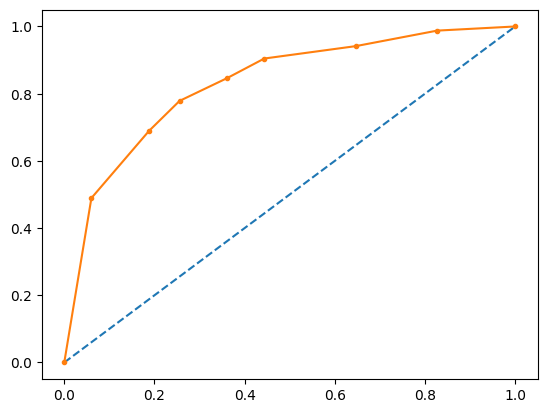

In [423]:
#AUC and ROC for the test data
probs= KNN.predict_proba(X_test_scale)
probs=probs[:, 1]

auc=roc_auc_score(Y_test, probs)
print(auc)

# calculate roc curve
fpr, tpr, thresholds=roc_curve(Y_test, probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

##Naive Bayes

In [424]:
model2=GaussianNB()
model2.fit(X_train, Y_train)
print(model2)

GaussianNB()


In [425]:
train_score=model2.score(X_train, Y_train)
test_score=model2.score(X_test, Y_test)
print('Accurecy of NNH on','\n','train data-', train_score,'\n','test data-', test_score)

Accurecy of NNH on 
 train data- 0.837863167760075 
 test data- 0.8144104803493449


In [426]:
predicted_labels = model2.predict(X_train)
print(metrics.confusion_matrix(Y_train, predicted_labels))
print(metrics.classification_report(Y_train, predicted_labels))

[[237  92]
 [ 81 657]]
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       329
           1       0.88      0.89      0.88       738

    accuracy                           0.84      1067
   macro avg       0.81      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [427]:
predicted=model2.predict(X_test)
print(metrics.confusion_matrix(Y_test,predicted))
print(metrics.classification_report(Y_test,predicted))

[[ 87  46]
 [ 39 286]]
              precision    recall  f1-score   support

           0       0.69      0.65      0.67       133
           1       0.86      0.88      0.87       325

    accuracy                           0.81       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.81      0.81      0.81       458



In [430]:
# AUC and ROC for the training data
probs = model2.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

AUC: 0.892


0.8667669172932331


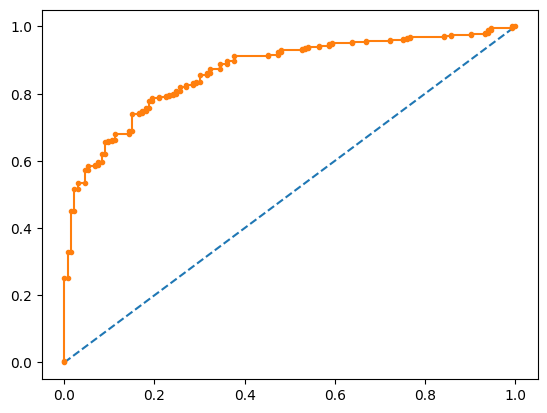

In [431]:
#AUC and ROC for the test data
probs= model2.predict_proba(X_test)
probs=probs[:, 1]

auc=roc_auc_score(Y_test, probs)
print(auc)

# calculate roc curve
fpr, tpr, thresholds=roc_curve(Y_test, probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

In [441]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Model Tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
log_reg_model = LogisticRegression(random_state=42, solver='liblinear')
grid_search = GridSearchCV(log_reg_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_
print('Best parameters:', best_params)

# Logistic Regression
log_reg_model = LogisticRegression(random_state=42, solver='liblinear', C=best_params['C'], penalty=best_params['penalty'])
log_reg_model.fit(X_train, Y_train)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Model Tuning
param_grid = {'n_neighbors': list(range(1, 21))}
knn_model = KNeighborsClassifier()
grid_search = GridSearchCV(knn_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_
print('Best parameters:', best_params)

# KNN
knn_model = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'])
knn_model.fit(X_train, Y_train)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Model Tuning
param_grid = {'max_depth': [3, 5, 7, 9], 'n_estimators': [50, 100, 150, 200]}
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_
print('Best parameters:', best_params)

# Random Forest
rf_model = RandomForestClassifier(max_depth=best_params['max_depth'], n_estimators=best_params['n_estimators'], random_state=42)
rf_model.fit(X_train, Y_train)
predicted2=rf_model.predict(X_test)
print(metrics.confusion_matrix(Y_test,predicted2))
print(metrics.classification_report(Y_test,predicted2))


from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Model Tuning
param_grid = {'n_estimators': [50, 100, 150, 200], 'learning_rate': [0.01, 0.1, 1, 10, 100]}
ada_model = AdaBoostClassifier(random_state=42)
grid_search = GridSearchCV(ada_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_
print('Best parameters:', best_params)

# AdaBoost
ada_model = AdaBoostClassifier(n_estimators=best_params['n_estimators'], learning_rate=best_params['learning_rate'], random_state=42)
ada_model.fit(X_train, Y_train)
predicted1=ada_model.predict(X_test)
print(metrics.confusion_matrix(Y_test,predicted1))
print(metrics.classification_report(Y_test,predicted1))


Best parameters: {'C': 10, 'penalty': 'l1'}
Best parameters: {'n_neighbors': 11}
Best parameters: {'max_depth': 7, 'n_estimators': 150}
[[ 86  47]
 [ 37 288]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.67       133
           1       0.86      0.89      0.87       325

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.81      0.82      0.81       458



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:627: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:627: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:627: RuntimeWarning: overflow encountered in exp
  sample_weight 

Best parameters: {'learning_rate': 0.1, 'n_estimators': 100}
[[ 80  53]
 [ 34 291]]
              precision    recall  f1-score   support

           0       0.70      0.60      0.65       133
           1       0.85      0.90      0.87       325

    accuracy                           0.81       458
   macro avg       0.77      0.75      0.76       458
weighted avg       0.80      0.81      0.81       458

